yt head :
0    393.0777
1    391.6012
2    390.7403
3    391.8214
4    394.3039
Name: close, dtype: float64
             yt        yt_       vt        yt1        yt2        yt3
0      393.0777   391.6012  6031199   390.4551   393.7283   390.1698
1      391.6012   390.7403  4330781   389.5892   391.8915   387.2619
2      390.7403   391.8214  3714176   391.2659   394.3440   390.0747
3      391.8214   394.3039  2393946   390.4551   393.0677   390.3750
4      394.3039   396.8414  3466971   390.2549   394.7644   389.2739
5      396.8414   403.8284  5453980   394.0937   397.0266   393.9285
6      403.8284   396.6262  5857528   398.3930   403.9035   398.0376
7      396.6262   398.1628  5522500   403.0527   404.8895   396.2929
8      398.1628   400.2549  7008464   399.3990   403.1277   396.0056
9      400.2549   395.7804  4103315   400.0296   401.0256   397.2969
10     395.7804   395.4601  4602925   401.5512   404.6092   395.6402
11     395.4601   400.2899  4399988   397.8975   398.3729   392.

C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:122: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(1000, activation="tanh", input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:124: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:127: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/25
800/800 [==============================] - 27s 33ms/step - loss: 0.1988
Epoch 2/25
800/800 [==============================] - 9s 12ms/step - loss: 0.0298
Epoch 3/25
800/800 [==============================] - 9s 11ms/step - loss: 0.0086
Epoch 4/25
800/800 [==============================] - 9s 11ms/step - loss: 0.0087
Epoch 5/25
800/800 [==============================] - 9s 11ms/step - loss: 0.0088
Epoch 6/25
800/800 [==============================] - 9s 12ms/step - loss: 0.0087
Epoch 7/25
800/800 [==============================] - 11s 13ms/step - loss: 0.0089
Epoch 8/25
800/800 [==============================] - 12s 15ms/step - loss: 0.0090
Epoch 9/25
800/800 [==============================] - 12s 15ms/step - loss: 0.0092
Epoch 10/25
800/800 [==============================] - 9s 11ms/step - loss: 0.0093
Epoch 11/25
800/800 [==============================] - 8s 11ms/step - loss: 0.0095
Epoch 12/25
800/800 [==============================] - 8s 10ms/step - loss: 0.0099
Epoch 13/

C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


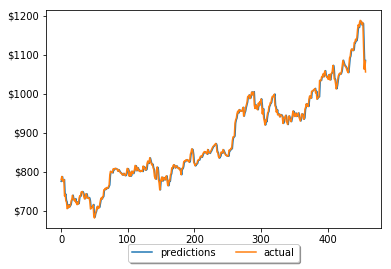

In [13]:
#predicting one time step(closing values using previous  closing values) without bootstrap
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
 
df=pd.read_csv("C:\\Users\\shankhajyoti\\Dropbox\\Deepak\\GOOGL_data.csv")
data_csv=df
 
#how many data we will use 
# (should not be more than dataset length )
data_to_use= len(data_csv)
 
# number of training data
# should be less than data_to_use
train_end =len(data_csv)-459
 
 
total_data=len(data_csv)
 
#most recent data is in the end 
#so need offset
start=total_data - data_to_use
 
 
#currently doing prediction only for 1 step ahead
steps_to_predict =1
 
  
yt = data_csv.iloc [start:total_data ,4]    #Close price
yt1 = data_csv.iloc [start:total_data ,1]   #Open
yt2 = data_csv.iloc [start:total_data ,2]   #High
yt3 = data_csv.iloc [start:total_data ,3]   #Low
vt = data_csv.iloc [start:total_data ,5]    # volume
 
 
print ("yt head :")
print (yt.head())
 
yt_ = yt.shift (-1)
     
data = pd.concat ([yt, yt_, vt, yt1, yt2, yt3], axis =1)
data. columns = ['yt', 'yt_', 'vt', 'yt1', 'yt2', 'yt3']
     
data = data.dropna()
     
print (data)
     
# target variable - closed price
# after shifting
y = data ['yt_']
 
        
#       closed,  volume,   open,  high,   low    
cols =['yt']
x = data [cols]
x_train=x.loc[0:799,:] 
x_test=x.loc[800:1257,:]   
y_train=y.loc[0:799]
y_test=y.loc[800:1257]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



scaler_x_train = preprocessing.MinMaxScaler ( feature_range =( -1, 1))
x_train = np. array (x_train).reshape ((len( x_train) ,len(cols)))
x_train_copy=x_train
smoothing_window_size =320
for di in range(0,800,smoothing_window_size):
    scaler_x_train.fit(x_train[di:di+smoothing_window_size,:])
    x_train[di:di+smoothing_window_size,:] = scaler_x_train.transform(x_train[di:di+smoothing_window_size,:])

    
x_test = np. array (x_test).reshape ((len( x_test) ,len(cols)))
x_test=scaler_x_train.transform(x_test)

x_train = x_train.reshape (x_train. shape + (1,)) 
x_test = x_test.reshape (x_test. shape + (1,))
    

    
    
    
    
    
    
scaler_y_train = preprocessing. MinMaxScaler ( feature_range =( -1, 1))
y_train = np.array (y_train).reshape ((len( y_train), 1))
y_train_copy=y_train
smoothing_window_size = 320
for di in range(0,800,smoothing_window_size):
    scaler_y_train.fit(y_train[di:di+smoothing_window_size,:])
    y_train[di:di+smoothing_window_size,:] = scaler_y_train.transform(y_train[di:di+smoothing_window_size,:])
    

#scaler_y_train.fit(y_train[di+smoothing_window_size:])
#y_train[di+smoothing_window_size:] = scaler_y_train.transform(y_train[di+smoothing_window_size:])
y_test = np. array (y_test).reshape ((len( y_test) ,1))
#y_test=scaler_y_train.transform(y_test)
 
     
#print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

 
     
     
 
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras.layers import  Dropout
 
 

fit1 = Sequential ()
fit1.add (LSTM (  1000 , activation = 'tanh', inner_activation = 'hard_sigmoid' , input_shape =(len(cols), 1) ))
fit1.add(Dropout(0.2))
fit1.add (Dense (output_dim =1, activation = 'linear'))
 
fit1.compile (loss ="mean_squared_error" , optimizer = "adam")   
fit1.fit (x_train, y_train, batch_size =20, nb_epoch =25, shuffle = False)
 
print (fit1.summary())
 

x_train_copy = np.array(x_train_copy).reshape (x_train_copy. shape + (1,)) 
#x_train = scaler_x_train.inverse_transform (np. array (x_train). reshape ((len( x_train), len(cols)))) 
#y_train = scaler_y_train.inverse_transform (np. array (y_train). reshape ((len( y_train), 1)))    
pred1 = fit1.predict (x_train_copy) 
#pred1 = scaler_y_train.inverse_transform (np. array (pred1). reshape ((len( pred1), 1)))
pred1=np.array(pred1).reshape((len(pred1),1))
sum=0.0
for i in range(len(y_train)):
    sum=sum+(y_train_copy[i,0]-pred1[i,0])**2

    
sum1=(sum/len(y_train))**0.5

#x_test = scaler_x_train.inverse_transform (np. array (x_test). reshape ((len( x_test), len(cols))))
#x_test = np.array(x_test).reshape (x_test. shape + (1,)) 
#y_test = scaler_y_train.inverse_transform (np. array (y_test). reshape ((len( y_test), 1)))
pred1 = fit1.predict (x_test) 
pred1 = scaler_y_train.inverse_transform (np. array (pred1). reshape ((len( y_test), 1)))
sum=0.0
for i in range(len(y_test)):
    sum=sum+(y_test[i,0]-pred1[i,0])**2

    
sum=(sum/len(y_test))**0.5

print("rmse_train",sum1)
print("rmse_test",sum)


prediction_data = pred1[-1]     
    
 
fit1.summary()
print ("Inputs: {}".format(fit1.input_shape))
print ("Outputs: {}".format(fit1.output_shape))
print ("Actual input: {}".format(x_test.shape))
print ("Actual output: {}".format(y_test.shape))
   
 

 
 



 
 
plt.plot(pred1, label="predictions")
 
 

plt.plot( [row[0] for row in y_test], label="actual")
 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
 
import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
 
ax = plt.axes()
ax.yaxis.set_major_formatter(tick)
 
 
plt.show()


In [4]:
# experimenting over the no of timesteps/unrollings 
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import concat
data_csv=pd.read_csv("C:\\Users\\shankhajyoti\\Dropbox\\Deepak\\GOOGL_data.csv")
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras.layers import  Dropout
 
#how many data we will use 
# (should not be more than dataset length )
data_to_use= len(data_csv)
 
# number of training data
# should be less than data_to_use
train_end =len(data_csv)-459
 
 
total_data=len(data_csv)
 
#most recent data is in the end 
#so need offset
start=total_data - data_to_use
 
 
#currently doing prediction only for 1 step ahead
steps_to_predict =1
 
  
yt = data_csv.iloc [start:total_data ,4]    #Close price
yt1 = data_csv.iloc [start:total_data ,1]   #Open
yt2 = data_csv.iloc [start:total_data ,2]   #High
yt3 = data_csv.iloc [start:total_data ,3]   #Low
vt = data_csv.iloc [start:total_data ,5]    # volume
 
 
print ("yt head :")
print (yt.head())
 
yt_ = yt.shift (-1)
     
data = pd.concat ([yt, yt_, vt, yt1, yt2, yt3], axis =1)
data. columns = ['yt', 'yt_', 'vt', 'yt1', 'yt2', 'yt3']
     
data = data.dropna()
     
print (data)
     
# target variable - closed price
# after shifting
y = data ['yt_']
 
        
#       closed,  volume,   open,  high,   low    
cols =['yt']
x = data [cols]
x_train=x.loc[0:799,:] 
x_test=x.loc[800:1257,:]   
y_train=y.loc[0:799]
y_test=y.loc[800:1257]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

timesteps=8
n_batch=11
scaler_x_train = preprocessing.MinMaxScaler ( feature_range =( -1, 1))
x_train = np. array (x_train).reshape ((len( x_train) ,len(cols)))
x_train_copy=x_train
smoothing_window_size = 320
for di in range(0,800,smoothing_window_size):
    scaler_x_train.fit(x_train[di:di+smoothing_window_size,:])
    x_train[di:di+smoothing_window_size,:] = scaler_x_train.transform(x_train[di:di+smoothing_window_size,:])

    
x_test = np. array (x_test).reshape ((len( x_test) ,len(cols)))
x_test_copy=x_test
x_test=scaler_x_train.transform(x_test)

x_train = x_train.reshape (len(x_train),1) 
x_test = x_test.reshape (len(x_test),1)
    

    
    
    
    
    
    
scaler_y_train = preprocessing. MinMaxScaler ( feature_range =( -1, 1))
y_train = np.array (y_train).reshape ((len( y_train), 1))
y_train_copy=y_train
smoothing_window_size = 320
for di in range(0,800,smoothing_window_size):
    scaler_y_train.fit(y_train[di:di+smoothing_window_size,:])
    y_train[di:di+smoothing_window_size,:] = scaler_y_train.transform(y_train[di:di+smoothing_window_size,:])
    


y_test = np. array (y_test).reshape ((len( y_test) ,1))
y_test=scaler_y_train.transform(y_test)
A=np.append(y_train,y_test,axis=0)
A=np.array(A).reshape(len(y_train)+len(y_test),1)
lag=timesteps
df = DataFrame(A)

columns = [df.shift(i) for i in range(lag,0,-1)]
columns.append(df)
df = concat(columns, axis=1)
df=np.array(df).reshape(len(df),timesteps+1)
const=len(x_train)
const2=len(x_test)
a=n_batch-(const2-((const2//n_batch)*n_batch))

x_train=df[timesteps:len(x_train),0:-1]
y_train=df[timesteps:const,-1]
x_test=df[const-a:const+const2,0:-1]
y_test=df[const-a:const+const2,-1]


 
     
     
 

 
seed =2016
np.random.seed (seed)
fit1 = Sequential ()
fit1.add (LSTM (  1000 , activation = 'tanh', inner_activation = 'hard_sigmoid' , batch_input_shape =(n_batch,timesteps, 1) ))
fit1.add(Dropout(0.2))


fit1.add (Dense (output_dim =1, activation = 'linear'))
 
fit1.compile (loss ="mean_squared_error" , optimizer = "adam")   
x_train=np.array(x_train).reshape(len(x_train),timesteps,1)

fit1.fit (x_train, y_train, batch_size =n_batch, nb_epoch =20, shuffle = False)
 
print (fit1.summary())
y_test=np.array(y_test).reshape(const2+a,1)
A=np.append(y_train_copy,y_test,axis=0)
A=np.array(A).reshape(len(y_train_copy)+len(y_test),1)
lag=timesteps
df = DataFrame(A)    
    
columns = [df.shift(i) for i in range(lag,0,-1)]
columns.append(df)
df = concat(columns, axis=1)
df=np.array(df).reshape(len(df),timesteps+1)
x_train_copy=df[timesteps:const,0:-1]
y_train_copy=df[timesteps:const,-1]

x_train_copy=np.array(x_train_copy).reshape(len(x_train_copy),timesteps,1)

pred1= fit1.predict(x_train_copy,batch_size=n_batch)
pred1=np.array(pred1).reshape(len(pred1),1)
y_train_copy=np.array(y_train_copy).reshape(len(pred1),1)


sum=0.0
for i in range(len(y_train_copy)):
    sum=sum+(y_train_copy[i,0]-pred1[i,0])**2

    
sum1=(sum/len(y_train))**0.5


x_test=np.array(x_test).reshape(len(x_test),timesteps,1)
pred1=fit1.predict(x_test,batch_size=n_batch) 
 
pred1 = scaler_y_train.inverse_transform (np. array (pred1). reshape ((len( pred1), 1)))

y_test = scaler_y_train.inverse_transform (np. array (y_test). reshape ((len( pred1), 1)))
sum=0.0
for i in range(a,len(y_test),1):
    sum=sum+(y_test[i,0]-pred1[i,0])**2

    
sum=(sum/len(y_test)-a)**0.5

print("rmse_train",sum1)
print("rmse_test",sum)


prediction_data = pred1[-1]     
    
 
fit1.summary()
print ("Inputs: {}".format(fit1.input_shape))
print ("Outputs: {}".format(fit1.output_shape))
print ("Actual input: {}".format(x_test.shape))
print ("Actual output: {}".format(y_test.shape))
   
 

 
 



 
 
plt.plot(pred1, label="predictions")
 
 

plt.plot( [row[0] for row in y_test], label="actual")
 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
 
import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
 
ax = plt.axes()
ax.yaxis.set_major_formatter(tick)
 
 
plt.show()

# measuring accuracy


SyntaxError: invalid syntax (<ipython-input-4-ac9ebc41cffa>, line 229)

yt head :
0    393.0777
1    391.6012
2    390.7403
3    391.8214
4    394.3039
Name: close, dtype: float64
             yt        yt_       vt        yt1        yt2        yt3
0      393.0777   391.6012  6031199   390.4551   393.7283   390.1698
1      391.6012   390.7403  4330781   389.5892   391.8915   387.2619
2      390.7403   391.8214  3714176   391.2659   394.3440   390.0747
3      391.8214   394.3039  2393946   390.4551   393.0677   390.3750
4      394.3039   396.8414  3466971   390.2549   394.7644   389.2739
5      396.8414   403.8284  5453980   394.0937   397.0266   393.9285
6      403.8284   396.6262  5857528   398.3930   403.9035   398.0376
7      396.6262   398.1628  5522500   403.0527   404.8895   396.2929
8      398.1628   400.2549  7008464   399.3990   403.1277   396.0056
9      400.2549   395.7804  4103315   400.0296   401.0256   397.2969
10     395.7804   395.4601  4602925   401.5512   404.6092   395.6402
11     395.4601   400.2899  4399988   397.8975   398.3729   392.

C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:123: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(1000, activation="tanh", batch_input_shape=(20, 1, 1), stateful=True, recurrent_activation="hard_sigmoid")`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:125: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:129: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1
800/800 [==============================] - 12s 15ms/step - loss: 0.2085
Epoch 1/1
800/800 [==============================] - 8s 10ms/step - loss: 0.1181
Epoch 1/1
800/800 [==============================] - 9s 11ms/step - loss: 0.0803
Epoch 1/1
800/800 [==============================] - 8s 11ms/step - loss: 1.3831
Epoch 1/1
800/800 [==============================] - 9s 11ms/step - loss: 1.0200
Epoch 1/1
800/800 [==============================] - 9s 11ms/step - loss: 0.3628
Epoch 1/1
800/800 [==============================] - 9s 11ms/step - loss: 0.3457
Epoch 1/1
800/800 [==============================] - 9s 11ms/step - loss: 0.3350
Epoch 1/1
800/800 [==============================] - 9s 11ms/step - loss: 0.3322
Epoch 1/1
800/800 [==============================] - 9s 11ms/step - loss: 0.3158
Epoch 1/1
800/800 [==============================] - 9s 11ms/step - loss: 0.2957
Epoch 1/1
800/800 [==============================] - 9s 11ms/step - loss: 0.3086
Epoch 1/1
800/800 [========

C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


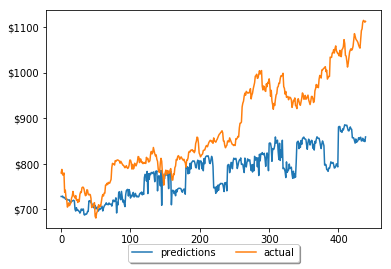

In [4]:
#To compare between performance of stateful and stateless lstms
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
 
df=pd.read_csv("C:\\Users\\shankhajyoti\\Dropbox\\Deepak\\GOOGL_data.csv")
data_csv=df
 
#how many data we will use 
# (should not be more than dataset length )
data_to_use= len(data_csv)
 
# number of training data
# should be less than data_to_use
train_end =len(data_csv)-459
 
 
total_data=len(data_csv)
 
#most recent data is in the end 
#so need offset
start=total_data - data_to_use
 
 
#currently doing prediction only for 1 step ahead
steps_to_predict =1
 
  
yt = data_csv.iloc [start:total_data ,4]    #Close price
yt1 = data_csv.iloc [start:total_data ,1]   #Open
yt2 = data_csv.iloc [start:total_data ,2]   #High
yt3 = data_csv.iloc [start:total_data ,3]   #Low
vt = data_csv.iloc [start:total_data ,5]    # volume
 
 
print ("yt head :")
print (yt.head())
 
yt_ = yt.shift (-1)
     
data = pd.concat ([yt, yt_, vt, yt1, yt2, yt3], axis =1)
data. columns = ['yt', 'yt_', 'vt', 'yt1', 'yt2', 'yt3']
     
data = data.dropna()
     
print (data)
     
# target variable - closed price
# after shifting
y = data ['yt_']
 
        
#       closed,  volume,   open,  high,   low    
cols =['yt']
x = data [cols]
x_train=x.loc[0:799,:] 
x_test=x.loc[800:1239,:]   
y_train=y.loc[0:799]
y_test=y.loc[800:1239]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



scaler_x_train = preprocessing.MinMaxScaler ( feature_range =( -1, 1))
x_train = np. array (x_train).reshape ((len( x_train) ,len(cols)))
x_train_copy=x_train
smoothing_window_size = 320
for di in range(0,800,smoothing_window_size):
    scaler_x_train.fit(x_train[di:di+smoothing_window_size,:])
    x_train[di:di+smoothing_window_size,:] = scaler_x_train.transform(x_train[di:di+smoothing_window_size,:])

    
x_test = np. array (x_test).reshape ((len( x_test) ,len(cols)))
x_test=scaler_x_train.transform(x_test)

x_train = x_train.reshape (x_train. shape + (1,)) 
x_test = x_test.reshape (x_test. shape + (1,))
    

    
    
    
    
    
    
scaler_y_train = preprocessing. MinMaxScaler ( feature_range =( -1, 1))
y_train = np.array (y_train).reshape ((len( y_train), 1))
y_train_copy=y_train
smoothing_window_size = 320
for di in range(0,800,smoothing_window_size):
    scaler_y_train.fit(y_train[di:di+smoothing_window_size,:])
    y_train[di:di+smoothing_window_size,:] = scaler_y_train.transform(y_train[di:di+smoothing_window_size,:])
    

#scaler_y_train.fit(y_train[di+smoothing_window_size:])
#y_train[di+smoothing_window_size:] = scaler_y_train.transform(y_train[di+smoothing_window_size:])
y_test = np. array (y_test).reshape ((len( y_test) ,1))
#y_test=scaler_y_train.transform(y_test)
 
     
#print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

n_batch=20 
     
     
 
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras.layers import  Dropout
 
 
seed =2016
np.random.seed (seed)
fit1 = Sequential ()
fit1.add (LSTM (  1000 , activation = 'tanh', inner_activation = 'hard_sigmoid' ,batch_input_shape =(n_batch,len(cols), 1) ,stateful=True))
fit1.add(Dropout(0.2))
fit1.add (Dense (output_dim =1, activation = 'linear'))
 
fit1.compile (loss ="mean_squared_error" , optimizer = "adam")
for iterator in range(25):
 fit1.fit (x_train, y_train, batch_size =n_batch, nb_epoch =25, shuffle = False)
 fit1.reset_states()

print (fit1.summary())
 

x_train_copy = np.array(x_train_copy).reshape (x_train_copy. shape + (1,)) 
#x_train = scaler_x_train.inverse_transform (np. array (x_train). reshape ((len( x_train), len(cols)))) 
#y_train = scaler_y_train.inverse_transform (np. array (y_train). reshape ((len( y_train), 1)))    
pred1 = fit1.predict (x_train_copy,batch_size=n_batch) 
#pred1 = scaler_y_train.inverse_transform (np. array (pred1). reshape ((len( pred1), 1)))
pred1=np.array(pred1).reshape((len(pred1),1))
sum=0.0
for i in range(len(y_train)):
    sum=sum+(y_train_copy[i,0]-pred1[i,0])**2

    
sum1=(sum/len(y_train))**0.5

#x_test = scaler_x_train.inverse_transform (np. array (x_test). reshape ((len( x_test), len(cols))))
#x_test = np.array(x_test).reshape (x_test. shape + (1,)) 
#y_test = scaler_y_train.inverse_transform (np. array (y_test). reshape ((len( y_test), 1)))
pred1 = fit1.predict (x_test,batch_size=n_batch) 
pred1 = scaler_y_train.inverse_transform (np. array (pred1). reshape ((len( y_test), 1)))
sum=0.0
for i in range(len(y_test)):
    sum=sum+(y_test[i,0]-pred1[i,0])**2

    
sum=(sum/len(y_test))**0.5

print("rmse_train",sum1)
print("rmse_test",sum)


prediction_data = pred1[-1]     
    
 
fit1.summary()
print ("Inputs: {}".format(fit1.input_shape))
print ("Outputs: {}".format(fit1.output_shape))
print ("Actual input: {}".format(x_test.shape))
print ("Actual output: {}".format(y_test.shape))
   
 

 
 



 
 
plt.plot(pred1, label="predictions")
 
 

plt.plot( [row[0] for row in y_test], label="actual")
 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
 
import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
 
ax = plt.axes()
ax.yaxis.set_major_formatter(tick)
 
 
plt.show()
#conclusion stateful lstms performed worse than stateless lstms as we had earlier used

yt head :
0    393.0777
1    391.6012
2    390.7403
3    391.8214
4    394.3039
Name: close, dtype: float64
             yt        yt_       vt        yt1        yt2        yt3
0      393.0777   391.6012  6031199   390.4551   393.7283   390.1698
1      391.6012   390.7403  4330781   389.5892   391.8915   387.2619
2      390.7403   391.8214  3714176   391.2659   394.3440   390.0747
3      391.8214   394.3039  2393946   390.4551   393.0677   390.3750
4      394.3039   396.8414  3466971   390.2549   394.7644   389.2739
5      396.8414   403.8284  5453980   394.0937   397.0266   393.9285
6      403.8284   396.6262  5857528   398.3930   403.9035   398.0376
7      396.6262   398.1628  5522500   403.0527   404.8895   396.2929
8      398.1628   400.2549  7008464   399.3990   403.1277   396.0056
9      400.2549   395.7804  4103315   400.0296   401.0256   397.2969
10     395.7804   395.4601  4602925   401.5512   404.6092   395.6402
11     395.4601   400.2899  4399988   397.8975   398.3729   392.

C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:123: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(1000, activation="tanh", input_shape=(1, 1), kernel_regularizer=<keras.reg..., recurrent_activation="hard_sigmoid")`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:125: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:128: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/25
800/800 [==============================] - 63s 79ms/step - loss: 0.2024
Epoch 2/25
800/800 [==============================] - 9s 12ms/step - loss: 0.0313
Epoch 3/25
800/800 [==============================] - 9s 11ms/step - loss: 0.0086
Epoch 4/25
800/800 [==============================] - 9s 11ms/step - loss: 0.0087
Epoch 5/25
800/800 [==============================] - 9s 12ms/step - loss: 0.0087
Epoch 6/25
800/800 [==============================] - 9s 12ms/step - loss: 0.0087
Epoch 7/25
800/800 [==============================] - 10s 12ms/step - loss: 0.0089
Epoch 8/25
800/800 [==============================] - 9s 12ms/step - loss: 0.0089
Epoch 9/25
800/800 [==============================] - 9s 12ms/step - loss: 0.0092
Epoch 10/25
800/800 [==============================] - 9s 11ms/step - loss: 0.0094
Epoch 11/25
800/800 [==============================] - 10s 13ms/step - loss: 0.0097
Epoch 12/25
800/800 [==============================] - 9s 11ms/step - loss: 0.0097
Epoch 13/2

C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


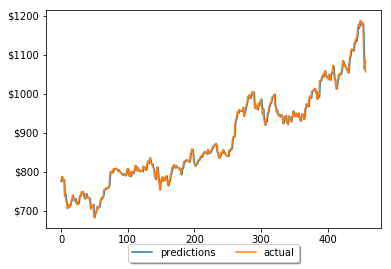

In [18]:
#To introduce regularization conclusion:on varying values of l1 and l2 its found that if we keep l2 around 0.04 or 0.05 and l1 to be 0 then rmse is close to without regularization but still without regularization it performs better 
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
 
df=pd.read_csv("C:\\Users\\shankhajyoti\\Dropbox\\Deepak\\GOOGL_data.csv")
data_csv=df
 
#how many data we will use 
# (should not be more than dataset length )
data_to_use= len(data_csv)
 
# number of training data
# should be less than data_to_use
train_end =len(data_csv)-459
 
 
total_data=len(data_csv)
 
#most recent data is in the end 
#so need offset
start=total_data - data_to_use
 
 
#currently doing prediction only for 1 step ahead
steps_to_predict =1
 
  
yt = data_csv.iloc [start:total_data ,4]    #Close price
yt1 = data_csv.iloc [start:total_data ,1]   #Open
yt2 = data_csv.iloc [start:total_data ,2]   #High
yt3 = data_csv.iloc [start:total_data ,3]   #Low
vt = data_csv.iloc [start:total_data ,5]    # volume
 
 
print ("yt head :")
print (yt.head())
 
yt_ = yt.shift (-1)
     
data = pd.concat ([yt, yt_, vt, yt1, yt2, yt3], axis =1)
data. columns = ['yt', 'yt_', 'vt', 'yt1', 'yt2', 'yt3']
     
data = data.dropna()
     
print (data)
     
# target variable - closed price
# after shifting
y = data ['yt_']
 
        
#       closed,  volume,   open,  high,   low    
cols =['yt']
x = data [cols]
x_train=x.loc[0:799,:] 
x_test=x.loc[800:1257,:]   
y_train=y.loc[0:799]
y_test=y.loc[800:1257]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



scaler_x_train = preprocessing.MinMaxScaler ( feature_range =( -1, 1))
x_train = np. array (x_train).reshape ((len( x_train) ,len(cols)))
x_train_copy=x_train
smoothing_window_size = 320
for di in range(0,800,smoothing_window_size):
    scaler_x_train.fit(x_train[di:di+smoothing_window_size,:])
    x_train[di:di+smoothing_window_size,:] = scaler_x_train.transform(x_train[di:di+smoothing_window_size,:])

    
x_test = np. array (x_test).reshape ((len( x_test) ,len(cols)))
x_test=scaler_x_train.transform(x_test)

x_train = x_train.reshape (x_train. shape + (1,)) 
x_test = x_test.reshape (x_test. shape + (1,))
    

    
    
    
    
    
    
scaler_y_train = preprocessing. MinMaxScaler ( feature_range =( -1, 1))
y_train = np.array (y_train).reshape ((len( y_train), 1))
y_train_copy=y_train
smoothing_window_size = 320
for di in range(0,800,smoothing_window_size):
    scaler_y_train.fit(y_train[di:di+smoothing_window_size,:])
    y_train[di:di+smoothing_window_size,:] = scaler_y_train.transform(y_train[di:di+smoothing_window_size,:])
    

#scaler_y_train.fit(y_train[di+smoothing_window_size:])
#y_train[di+smoothing_window_size:] = scaler_y_train.transform(y_train[di+smoothing_window_size:])
y_test = np. array (y_test).reshape ((len( y_test) ,1))
#y_test=scaler_y_train.transform(y_test)
 
     
#print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

 
     
     
 
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras.layers import  Dropout
from keras import regularizers 
 
seed =2016
np.random.seed (seed)
fit1 = Sequential ()
fit1.add (LSTM (  1000 , activation = 'tanh', inner_activation = 'hard_sigmoid' , input_shape =(len(cols), 1),kernel_regularizer=regularizers.l1_l2(l1=0.0,l2=0.0) ))
fit1.add(Dropout(0.2))
fit1.add (Dense (output_dim =1, activation = 'linear'))
 
fit1.compile (loss ="mean_squared_error" , optimizer = "adam")   
fit1.fit (x_train, y_train, batch_size =20, nb_epoch =25, shuffle = False)
 
print (fit1.summary())
 

x_train_copy = np.array(x_train_copy).reshape (x_train_copy. shape + (1,)) 
#x_train = scaler_x_train.inverse_transform (np. array (x_train). reshape ((len( x_train), len(cols)))) 
#y_train = scaler_y_train.inverse_transform (np. array (y_train). reshape ((len( y_train), 1)))    
pred1 = fit1.predict (x_train_copy) 
#pred1 = scaler_y_train.inverse_transform (np. array (pred1). reshape ((len( pred1), 1)))
pred1=np.array(pred1).reshape((len(pred1),1))
sum=0.0
for i in range(len(y_train)):
    sum=sum+(y_train_copy[i,0]-pred1[i,0])**2

    
sum1=(sum/len(y_train))**0.5

#x_test = scaler_x_train.inverse_transform (np. array (x_test). reshape ((len( x_test), len(cols))))
#x_test = np.array(x_test).reshape (x_test. shape + (1,)) 
#y_test = scaler_y_train.inverse_transform (np. array (y_test). reshape ((len( y_test), 1)))
pred1 = fit1.predict (x_test) 
pred1 = scaler_y_train.inverse_transform (np. array (pred1). reshape ((len( y_test), 1)))
sum=0.0
for i in range(len(y_test)):
    sum=sum+(y_test[i,0]-pred1[i,0])**2

    
sum=(sum/len(y_test))**0.5

print("rmse_train",sum1)
print("rmse_test",sum)


prediction_data = pred1[-1]     
    
 
fit1.summary()
print ("Inputs: {}".format(fit1.input_shape))
print ("Outputs: {}".format(fit1.output_shape))
print ("Actual input: {}".format(x_test.shape))
print ("Actual output: {}".format(y_test.shape))
   
 

 
 



 
 
plt.plot(pred1, label="predictions")
 
 

plt.plot( [row[0] for row in y_test], label="actual")
 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
 
import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
 
ax = plt.axes()
ax.yaxis.set_major_formatter(tick)
 
 
plt.show()


yt head :
0    393.0777
1    391.6012
2    390.7403
3    391.8214
4    394.3039
Name: close, dtype: float64
             yt        yt_       vt        yt1        yt2        yt3
0      393.0777   391.6012  6031199   390.4551   393.7283   390.1698
1      391.6012   390.7403  4330781   389.5892   391.8915   387.2619
2      390.7403   391.8214  3714176   391.2659   394.3440   390.0747
3      391.8214   394.3039  2393946   390.4551   393.0677   390.3750
4      394.3039   396.8414  3466971   390.2549   394.7644   389.2739
5      396.8414   403.8284  5453980   394.0937   397.0266   393.9285
6      403.8284   396.6262  5857528   398.3930   403.9035   398.0376
7      396.6262   398.1628  5522500   403.0527   404.8895   396.2929
8      398.1628   400.2549  7008464   399.3990   403.1277   396.0056
9      400.2549   395.7804  4103315   400.0296   401.0256   397.2969
10     395.7804   395.4601  4602925   401.5512   404.6092   395.6402
11     395.4601   400.2899  4399988   397.8975   398.3729   392.

C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:123: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(1000, activation="tanh", return_sequences=True, input_shape=(1, 1), kernel_regularizer=<keras.reg..., recurrent_activation="hard_sigmoid")`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:125: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(500, activation="tanh", kernel_regularizer=<keras.reg..., recurrent_activation="hard_sigmoid")`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:127: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:130: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/20
 36/800 [>.............................] - ETA: 1:20:31 - loss: 258.6113

C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (2.359172). Check your callbacks.
  % delta_t_median)


800/800 [==============================] - 244s 305ms/step - loss: 76.3029
Epoch 2/20
800/800 [==============================] - 16s 20ms/step - loss: 0.6749
Epoch 3/20
800/800 [==============================] - 16s 20ms/step - loss: 0.2532
Epoch 4/20
800/800 [==============================] - 16s 20ms/step - loss: 0.2122
Epoch 5/20
800/800 [==============================] - 16s 20ms/step - loss: 0.1351
Epoch 6/20
800/800 [==============================] - 16s 20ms/step - loss: 0.0954
Epoch 7/20
800/800 [==============================] - 16s 20ms/step - loss: 0.0748
Epoch 8/20
800/800 [==============================] - 16s 20ms/step - loss: 0.0753
Epoch 9/20
800/800 [==============================] - 16s 20ms/step - loss: 0.1092
Epoch 10/20
800/800 [==============================] - 16s 20ms/step - loss: 0.0692
Epoch 11/20
800/800 [==============================] - 16s 20ms/step - loss: 0.0545
Epoch 12/20
800/800 [==============================] - 16s 20ms/step - loss: 0.0985
Epoch 13/

C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


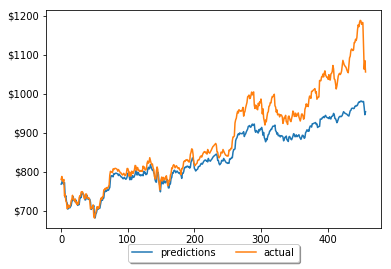

In [29]:
#introducing stacks of lstms  with variable regularization in each layer 
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
 
df=pd.read_csv("C:\\Users\\shankhajyoti\\Dropbox\\Deepak\\GOOGL_data.csv")
data_csv=df
 
#how many data we will use 
# (should not be more than dataset length )
data_to_use= len(data_csv)
 
# number of training data
# should be less than data_to_use
train_end =len(data_csv)-459
 
 
total_data=len(data_csv)
 
#most recent data is in the end 
#so need offset
start=total_data - data_to_use
 
 
#currently doing prediction only for 1 step ahead
steps_to_predict =1
 
  
yt = data_csv.iloc [start:total_data ,4]    #Close price
yt1 = data_csv.iloc [start:total_data ,1]   #Open
yt2 = data_csv.iloc [start:total_data ,2]   #High
yt3 = data_csv.iloc [start:total_data ,3]   #Low
vt = data_csv.iloc [start:total_data ,5]    # volume
 
 
print ("yt head :")
print (yt.head())
 
yt_ = yt.shift (-1)
     
data = pd.concat ([yt, yt_, vt, yt1, yt2, yt3], axis =1)
data. columns = ['yt', 'yt_', 'vt', 'yt1', 'yt2', 'yt3']
     
data = data.dropna()
     
print (data)
     
# target variable - closed price
# after shifting
y = data ['yt_']
 
        
#       closed,  volume,   open,  high,   low    
cols =['yt']
x = data [cols]
x_train=x.loc[0:799,:] 
x_test=x.loc[800:1257,:]   
y_train=y.loc[0:799]
y_test=y.loc[800:1257]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



scaler_x_train = preprocessing.MinMaxScaler ( feature_range =( -1, 1))
x_train = np. array (x_train).reshape ((len( x_train) ,len(cols)))
x_train_copy=x_train
smoothing_window_size = 200
for di in range(0,800,smoothing_window_size):
    scaler_x_train.fit(x_train[di:di+smoothing_window_size,:])
    x_train[di:di+smoothing_window_size,:] = scaler_x_train.transform(x_train[di:di+smoothing_window_size,:])

    
x_test = np. array (x_test).reshape ((len( x_test) ,len(cols)))
x_test=scaler_x_train.transform(x_test)

x_train = x_train.reshape (x_train. shape + (1,)) 
x_test = x_test.reshape (x_test. shape + (1,))
    

    
    
    
    
    
    
scaler_y_train = preprocessing. MinMaxScaler ( feature_range =( -1, 1))
y_train = np.array (y_train).reshape ((len( y_train), 1))
y_train_copy=y_train
smoothing_window_size = 200
for di in range(0,800,smoothing_window_size):
    scaler_y_train.fit(y_train[di:di+smoothing_window_size,:])
    y_train[di:di+smoothing_window_size,:] = scaler_y_train.transform(y_train[di:di+smoothing_window_size,:])
    

#scaler_y_train.fit(y_train[di+smoothing_window_size:])
#y_train[di+smoothing_window_size:] = scaler_y_train.transform(y_train[di+smoothing_window_size:])
y_test = np. array (y_test).reshape ((len( y_test) ,1))
#y_test=scaler_y_train.transform(y_test)
 
     
#print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

 
     
     
 
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras.layers import  Dropout
from keras import regularizers 
 
seed =2016
np.random.seed (seed)
fit1 = Sequential ()
fit1.add (LSTM (  1000 , activation = 'tanh', inner_activation = 'hard_sigmoid' ,return_sequences=True, input_shape =(len(cols), 1),kernel_regularizer=regularizers.l1_l2(l1=0.0,l2=0.0) ))
fit1.add(Dropout(0.2))
fit1.add(LSTM(500,activation = 'tanh', inner_activation = 'hard_sigmoid' , kernel_regularizer=regularizers.l1_l2(l1=0.0,l2=0.2)))
fit1.add(Dropout(0.1))
fit1.add (Dense (output_dim =1, activation = 'linear'))
 
fit1.compile (loss ="mean_squared_error" , optimizer = "adam")   
fit1.fit (x_train, y_train, batch_size =18, nb_epoch =20, shuffle = False)
 
print (fit1.summary())
 

x_train_copy = np.array(x_train_copy).reshape (x_train_copy. shape + (1,)) 
#x_train = scaler_x_train.inverse_transform (np. array (x_train). reshape ((len( x_train), len(cols)))) 
#y_train = scaler_y_train.inverse_transform (np. array (y_train). reshape ((len( y_train), 1)))    
pred1 = fit1.predict (x_train_copy) 
#pred1 = scaler_y_train.inverse_transform (np. array (pred1). reshape ((len( pred1), 1)))
pred1=np.array(pred1).reshape((len(pred1),1))
sum=0.0
for i in range(len(y_train)):
    sum=sum+(y_train_copy[i,0]-pred1[i,0])**2

    
sum1=(sum/len(y_train))**0.5

#x_test = scaler_x_train.inverse_transform (np. array (x_test). reshape ((len( x_test), len(cols))))
#x_test = np.array(x_test).reshape (x_test. shape + (1,)) 
#y_test = scaler_y_train.inverse_transform (np. array (y_test). reshape ((len( y_test), 1)))
pred1 = fit1.predict (x_test) 
pred1 = scaler_y_train.inverse_transform (np. array (pred1). reshape ((len( y_test), 1)))
sum=0.0
for i in range(len(y_test)):
    sum=sum+(y_test[i,0]-pred1[i,0])**2

    
sum=(sum/len(y_test))**0.5

print("rmse_train",sum1)
print("rmse_test",sum)


prediction_data = pred1[-1]     
    
 
fit1.summary()
print ("Inputs: {}".format(fit1.input_shape))
print ("Outputs: {}".format(fit1.output_shape))
print ("Actual input: {}".format(x_test.shape))
print ("Actual output: {}".format(y_test.shape))
   
 

 
 



 
 
plt.plot(pred1, label="predictions")
 
 

plt.plot( [row[0] for row in y_test], label="actual")
 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
 
import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
 
ax = plt.axes()
ax.yaxis.set_major_formatter(tick)
 
 
plt.show()
#conclusion:while the training error remains nearly same the test error is increasing drastically after applying stacks of lstm maybe due to overfitting

yt head :
0    393.0777
1    391.6012
2    390.7403
3    391.8214
4    394.3039
Name: close, dtype: float64
             yt        yt_       vt        yt1        yt2        yt3
0      393.0777   391.6012  6031199   390.4551   393.7283   390.1698
1      391.6012   390.7403  4330781   389.5892   391.8915   387.2619
2      390.7403   391.8214  3714176   391.2659   394.3440   390.0747
3      391.8214   394.3039  2393946   390.4551   393.0677   390.3750
4      394.3039   396.8414  3466971   390.2549   394.7644   389.2739
5      396.8414   403.8284  5453980   394.0937   397.0266   393.9285
6      403.8284   396.6262  5857528   398.3930   403.9035   398.0376
7      396.6262   398.1628  5522500   403.0527   404.8895   396.2929
8      398.1628   400.2549  7008464   399.3990   403.1277   396.0056
9      400.2549   395.7804  4103315   400.0296   401.0256   397.2969
10     395.7804   395.4601  4602925   401.5512   404.6092   395.6402
11     395.4601   400.2899  4399988   397.8975   398.3729   392.

C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:123: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(1000, activation="tanh", input_shape=(1, 1), kernel_regularizer=<keras.reg..., recurrent_activation="hard_sigmoid")`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:125: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:128: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1
 40/800 [>.............................] - ETA: 37:46 - loss: 0.6703  

C:\Users\shankhajyoti\Anaconda2\envs\deeplearning\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.695280). Check your callbacks.
  % delta_t_median)


800/800 [==============================] - 130s 162ms/step - loss: 0.2022
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 1000)              4008000   
_________________________________________________________________
dropout_26 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 1001      
Total params: 4,009,001
Trainable params: 4,009,001
Non-trainable params: 0
_________________________________________________________________
None
rmse_train 0.288851712155906
rmse_test 125.82796446451523
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 1000)              4008000   
_____________________________________________________________

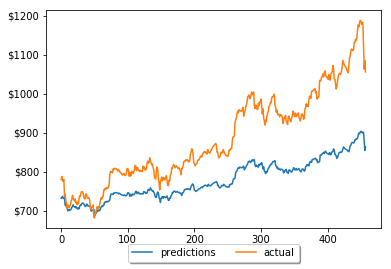

In [28]:
#minimizing over different activation functions
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
 
df=pd.read_csv("C:\\Users\\shankhajyoti\\Dropbox\\Deepak\\GOOGL_data.csv")
data_csv=df
 
#how many data we will use 
# (should not be more than dataset length )
data_to_use= len(data_csv)
 
# number of training data
# should be less than data_to_use
train_end =len(data_csv)-459
 
 
total_data=len(data_csv)
 
#most recent data is in the end 
#so need offset
start=total_data - data_to_use
 
 
#currently doing prediction only for 1 step ahead
steps_to_predict =1
 
  
yt = data_csv.iloc [start:total_data ,4]    #Close price
yt1 = data_csv.iloc [start:total_data ,1]   #Open
yt2 = data_csv.iloc [start:total_data ,2]   #High
yt3 = data_csv.iloc [start:total_data ,3]   #Low
vt = data_csv.iloc [start:total_data ,5]    # volume
 
 
print ("yt head :")
print (yt.head())
 
yt_ = yt.shift (-1)
     
data = pd.concat ([yt, yt_, vt, yt1, yt2, yt3], axis =1)
data. columns = ['yt', 'yt_', 'vt', 'yt1', 'yt2', 'yt3']
     
data = data.dropna()
     
print (data)
     
# target variable - closed price
# after shifting
y = data ['yt_']
 
        
#       closed,  volume,   open,  high,   low    
cols =['yt']
x = data [cols]
x_train=x.loc[0:799,:] 
x_test=x.loc[800:1257,:]   
y_train=y.loc[0:799]
y_test=y.loc[800:1257]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



scaler_x_train = preprocessing.MinMaxScaler ( feature_range =( -1, 1))
x_train = np. array (x_train).reshape ((len( x_train) ,len(cols)))
x_train_copy=x_train
smoothing_window_size = 
for di in range(0,800,smoothing_window_size):
    scaler_x_train.fit(x_train[di:di+smoothing_window_size,:])
    x_train[di:di+smoothing_window_size,:] = scaler_x_train.transform(x_train[di:di+smoothing_window_size,:])

    
x_test = np. array (x_test).reshape ((len( x_test) ,len(cols)))
x_test=scaler_x_train.transform(x_test)

x_train = x_train.reshape (x_train. shape + (1,)) 
x_test = x_test.reshape (x_test. shape + (1,))
    

    
    
    
    
    
    
scaler_y_train = preprocessing. MinMaxScaler ( feature_range =( -1, 1))
y_train = np.array (y_train).reshape ((len( y_train), 1))
y_train_copy=y_train
smoothing_window_size = 320
for di in range(0,800,smoothing_window_size):
    scaler_y_train.fit(y_train[di:di+smoothing_window_size,:])
    y_train[di:di+smoothing_window_size,:] = scaler_y_train.transform(y_train[di:di+smoothing_window_size,:])
    

#scaler_y_train.fit(y_train[di+smoothing_window_size:])
#y_train[di+smoothing_window_size:] = scaler_y_train.transform(y_train[di+smoothing_window_size:])
y_test = np. array (y_test).reshape ((len( y_test) ,1))
#y_test=scaler_y_train.transform(y_test)
 
     
#print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

 
     
     
 
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras.layers import  Dropout
from keras import regularizers 
 
seed =2016
np.random.seed (seed)
fit1 = Sequential ()
fit1.add (LSTM (  1000 , activation = 'tanh', inner_activation = 'hard_sigmoid' , input_shape =(len(cols), 1),kernel_regularizer=regularizers.l1_l2(l1=0.0,l2=0.0) ))
fit1.add(Dropout(0.2))
fit1.add (Dense (output_dim =1, activation = 'linear'))
 
fit1.compile (loss ="mean_squared_error" , optimizer = "adam")   
fit1.fit (x_train, y_train, batch_size =20, nb_epoch =1, shuffle = False)
 
print (fit1.summary())
 

x_train_copy = np.array(x_train_copy).reshape (x_train_copy. shape + (1,)) 
#x_train = scaler_x_train.inverse_transform (np. array (x_train). reshape ((len( x_train), len(cols)))) 
#y_train = scaler_y_train.inverse_transform (np. array (y_train). reshape ((len( y_train), 1)))    
pred1 = fit1.predict (x_train_copy) 
#pred1 = scaler_y_train.inverse_transform (np. array (pred1). reshape ((len( pred1), 1)))
pred1=np.array(pred1).reshape((len(pred1),1))
sum=0.0
for i in range(len(y_train)):
    sum=sum+(y_train_copy[i,0]-pred1[i,0])**2

    
sum1=(sum/len(y_train))**0.5

#x_test = scaler_x_train.inverse_transform (np. array (x_test). reshape ((len( x_test), len(cols))))
#x_test = np.array(x_test).reshape (x_test. shape + (1,)) 
#y_test = scaler_y_train.inverse_transform (np. array (y_test). reshape ((len( y_test), 1)))
pred1 = fit1.predict (x_test) 
pred1 = scaler_y_train.inverse_transform (np. array (pred1). reshape ((len( y_test), 1)))
sum=0.0
for i in range(len(y_test)):
    sum=sum+(y_test[i,0]-pred1[i,0])**2

    
sum=(sum/len(y_test))**0.5

print("rmse_train",sum1)
print("rmse_test",sum)


prediction_data = pred1[-1]     
    
 
fit1.summary()
print ("Inputs: {}".format(fit1.input_shape))
print ("Outputs: {}".format(fit1.output_shape))
print ("Actual input: {}".format(x_test.shape))
print ("Actual output: {}".format(y_test.shape))
   
 

import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
 
ax = plt.axes()
ax.yaxis.set_major_formatter(tick)
 
 



 
 
plt.plot(pred1, label="predictions")
 
 

plt.plot( [row[0] for row in y_test], label="actual")
 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
 

 
plt.show()
#conclusion:as we increase the no of epochs the error keeps on reducing but after 20 epochs the error reduces at a very slow rate so for computational purpose we keep epochs =20
#conclusion:after varying through the first layer between sigmoid relu and tanh functions its observed that tanh for activation and sigmoid for recurrent activation has the least rmse 